# Indicators of Heavy Traffic on I-94

The project focused on analyzing a dataset related to westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).

The main objective of the analysis was to identify several indicators that could explain heavy traffic on I-94. These indicators were expected to include factors such as weather conditions, time of day, and time of the week.

## The I-94 Traffic Dataset

The dataset used for the analysis was made available by John Hogue and could be downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

### Importing required libraries

In [2]:
import pandas as pd 
# pandas is a powerful data manipulation library
import matplotlib.pyplot as plt
# matplotlib is used for plotting graphs
import seaborn as sns
# seaborn is a statistical data visualization library built on top of matplotlib

### Storing CSV in a DataFrame

In [3]:
traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

### Take a peak of the dataset

In [4]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [5]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [6]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


`info()` shows summary of the data in one snapshot.

The dataset contains 48,204 rows and 9 columns, where each row represents traffic and weather information recorded for a specific hour. The data covers the period from October 2, 2012, at 09:00:00 to September 30, 2018, at 23:00:00. 

According to the [dataset documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume), the traffic data was collected from a station situated approximately midway between Minneapolis and Saint Paul. At this station, the route direction is westbound, meaning it records vehicles moving from east to west. Therefore, the analysis results are expected to describe westbound traffic near this station, and it is advisable not to generalize the findings to the entire I-94 highway.

### Trying to figure out what the dataset tells us

In [7]:
traffic['holiday'].value_counts()

holiday
Labor Day                    7
Christmas Day                6
Thanksgiving Day             6
Martin Luther King Jr Day    6
New Years Day                6
Veterans Day                 5
Columbus Day                 5
Memorial Day                 5
Washingtons Birthday         5
State Fair                   5
Independence Day             5
Name: count, dtype: int64

In [8]:
traffic.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


## Exploratory visualization

### Analyzing Traffic Volumes

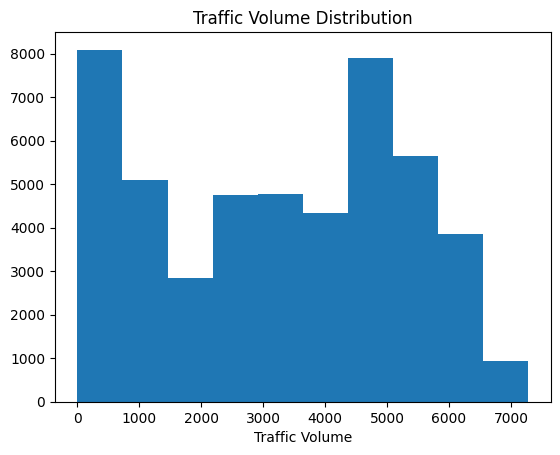

In [9]:
plt.hist(traffic['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.title('Traffic Volume Distribution')
plt.show()

In [10]:
traffic['traffic_volume'].describe()


count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between October 2, 2012, at 09:00:00 and September 30, 2018, at 23:00:00, the hourly traffic volume was reported to range from 0 to 7,280 cars, with an average of about 3,260 cars. It was indicated that around 25 percent of the time, 1,193 cars or fewer passed the station each hour, which likely corresponds to nighttime periods or times when road construction was taking place. It was also noted that during another 25 percent of the time, the traffic volume was about four times higher, reaching 4,933 cars or more.

### Traffic Volume: Day vs. Night

The dataset was divided into two parts. Daytime data was defined as the hours from 7 AM to 7 PM, spanning 12 hours, while nighttime data was defined as the hours from 7 PM to 7 AM, also spanning 12 hours. The division does not perfectly distinguish between day and night, but it serves as a reasonable starting point.

In [11]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(day.shape)

night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


### Traffic Volume: Day vs. Night (II)

After separating the data into day and night, the traffic volume histograms were analyzed side by side using a grid chart.

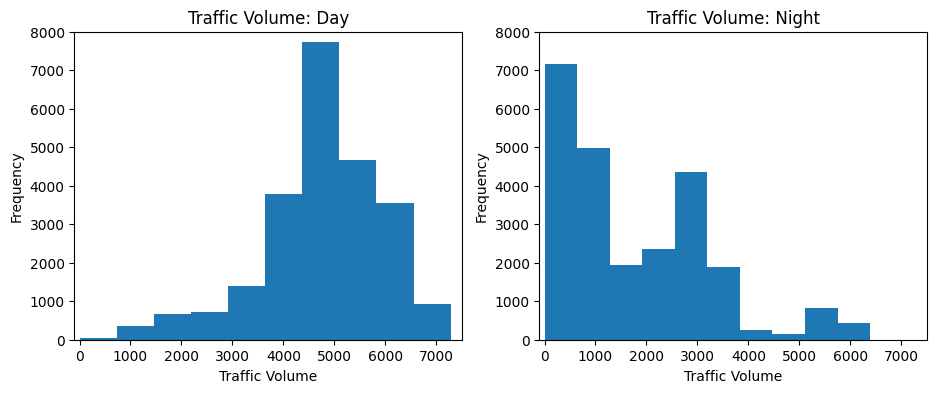

In [12]:
plt.figure(figsize=(11,4))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [15]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [16]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram for daytime traffic volume was found to be left skewed, indicating that most traffic volumes were high. It was observed that 75 percent of the time, 4,252 or more cars passed the station each hour, since only 25 percent of the values were below 4,252.

In contrast, the histogram for nighttime traffic volume showed a right-skewed distribution, meaning most traffic values were low. It was noted that 75 percent of the time, fewer than 2,819 cars passed the station each hour.

Although there were still instances where traffic exceeded 5,000 cars per hour during the night, the overall nighttime traffic level was generally light. Since the objective was to identify indicators of heavy traffic, the analysis continued by focusing exclusively on the daytime data.